# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.4 Thompson Beta

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a Thompson Beta algorithm. 



In [46]:
#Tompson Beta policy
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        #For each arm, maintain success and failures
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        
    def act(self):
        """Sample beta distribution from success and failures"""
        #make a p array of all
        '''
        pa = [()]*num_actions
        for i in range(0,num_actions):
            #pa[i]=(self.successes[i], self.failures[i])
            pa[i]=(self.successes[i] - self.failures[i])
            pa = np.asarray(pa)
        '''     
        pa = [1]*num_actions 
        for i in range(0, num_actions):
            pa[i] = np.random.beta(1+self.successes[i] , 1+self.failures[i])
            
        """Play the max of the sampled values"""
        current_action = np.argmax(pa)
        print(pa)
        print(current_action)
        #current_action = 0
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Now let's prepare the simulation. 

In [47]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"


What do you think the regret graph would look like?

Distribution: normal (array([ 1.67210906,  0.04144904, -2.26004314,  0.55185287, -0.99557374,
       -0.2838564 , -0.50553487, -0.05963477, -0.54748047,  0.61487342]), array([0.16003572, 0.39623439, 0.70679209, 0.13345484, 0.97314585,
       0.28711056, 0.11221114, 0.52693607, 0.53345874, 0.62434873]))
Optimal arm: 0
[0.7333944063748541, 0.1600898764351132, 0.45179095013707454, 0.2858512518599154, 0.8724347442846676, 0.4802811270004414, 0.7119007998037794, 0.8248131548263044, 0.5831882752468279, 0.5814666166967126]
4
[0.20790906380676527, 0.5846765779282062, 0.45174664830823835, 0.69205056114006, 0.5360857746508287, 0.15850128721947593, 0.23236548553645583, 0.34570287429265667, 0.8495280236994766, 0.32780088562864346]
8
[0.1698817264214838, 0.4700271030708062, 0.434643157805717, 0.30030303216211457, 0.2693049863085071, 0.47894106148562626, 0.6368367505907417, 0.726837573139236, 0.204246735248537, 0.14178161648362733]
7
[0.8066362348737995, 0.2915899123684868, 0.49988525902919206, 0.786

[0.7549687471022564, 0.6423637576396815, 0.2666830723886127, 0.9956514119563435, 0.6518485085011636, 0.6855455290943364, 0.7754005831564381, 0.8011353363832476, 0.12480445465824577, 0.851934078483758]
3
[0.9026131985314734, 0.18128114313260055, 0.21885574272428795, 0.9968123361975816, 0.4027985765848871, 0.21929973230920727, 0.3242538505495567, 0.12741061986275698, 0.3742111515953685, 0.9469161337516978]
3
[0.9095312571931402, 0.36551038558214, 0.5977590327601982, 0.9985088961320081, 0.18400281563917137, 0.3529742701923768, 0.42771240837334795, 0.7943443978765085, 0.2943898080587994, 0.7125100566539071]
3
[0.9574210740965562, 0.4350232528102098, 0.43656299391478204, 0.9990178183592501, 0.2817537189304698, 0.11519668167027644, 0.46769980908890507, 0.2688554830981915, 0.310693513578852, 0.7836572244962462]
3
[0.9686329819089137, 0.19668223143607144, 0.490989147437417, 0.996837736395672, 0.20916646788916599, 0.6154519610463676, 0.22487690609147462, 0.3234422534699005, 0.44067879078568084,

[0.942172354589235, 0.6888690205742642, 0.2581436157566792, 0.9967996636563443, 0.5986553256293622, 0.3771306734852291, 0.11135163238453012, 0.4169385418620353, 0.5191027925048927, 0.7150103808637356]
3
[0.9639333160756713, 0.6893495035835255, 0.19067835590617319, 0.9988960710485583, 0.15974506946738332, 0.8169336419332747, 0.16220566667762937, 0.7176392713263329, 0.6300139941309113, 0.8884919728544702]
3
[0.965716334440149, 0.2144616641857622, 0.4561758306503926, 0.999723034944859, 0.45582981122700933, 0.6945320886834286, 0.35501394672494246, 0.3295837417626866, 0.7133428921882066, 0.7856031919808313]
3
[0.8969170714776076, 0.12125683427778024, 0.39626962433502566, 0.9993116951993375, 0.521605115182634, 0.6410542318849408, 0.41292715395542123, 0.06888933739292959, 0.6291260178977796, 0.630521384179338]
3
[0.9799455376712491, 0.42304311736111405, 0.38187330249134294, 0.9975498125436306, 0.2650608499476063, 0.6958172945409141, 0.5179379790857971, 0.25949222416526374, 0.8423390037051873,

3
[0.9814634071930579, 0.5649248718375602, 0.17740251141846097, 0.999200498675698, 0.5555400323300304, 0.4178556884714753, 0.1998127583971348, 0.1828013236239425, 0.621668174858572, 0.9225186749628319]
3
[0.9007436073013005, 0.8881435162038201, 0.5886053641457655, 0.9986247589221399, 0.34475696129418043, 0.5173089261887074, 0.49167129350397987, 0.05808583899367993, 0.39258004932664864, 0.732862866443582]
3
[0.9824262953136815, 0.31150942356152556, 0.5601381836756013, 0.9992958049780373, 0.6092476556683637, 0.38734847889375484, 0.5742184955252789, 0.5885845173325059, 0.7581457342281468, 0.7008779584052949]
3
[0.9784761833130026, 0.2719466928129551, 0.6812939309951612, 0.9978055735155259, 0.20171541668496454, 0.45794287624432745, 0.4700378324762404, 0.4055202388451467, 0.3320873171153315, 0.8924682060857035]
3
[0.9464087126497558, 0.19471822992395646, 0.35234213662932934, 0.9982338694702422, 0.09110576059245122, 0.48190034955876343, 0.19587088633063907, 0.5584943020821845, 0.228207516934

3
[0.9885856206767283, 0.14123739954283565, 0.24744866461133333, 0.998190595916133, 0.3168764647124649, 0.14701817981436474, 0.2663713970552463, 0.23760021857288038, 0.257342141374993, 0.7869609466844287]
3
[0.9338603290695143, 0.3931782169580166, 0.3107323754937045, 0.9993855292402313, 0.5820192511647021, 0.506576486336677, 0.27395571417474857, 0.5818959319948659, 0.1603180665841724, 0.9961147227799849]
3
[0.9663867525860284, 0.056232789645079946, 0.6699202546117834, 0.9992693983867484, 0.5565870230208023, 0.15403031401260964, 0.15081649587769394, 0.0734164346382886, 0.757587015877668, 0.788984527501317]
3
[0.9294533422103454, 0.6106693778947221, 0.7030746633363041, 0.9995604377219284, 0.3671525949427356, 0.4292646686534322, 0.6026953048240377, 0.7399599469072193, 0.3890783440122087, 0.8302851979647075]
3
[0.9535163461080102, 0.40010466424951513, 0.4346310925029723, 0.9987372043762085, 0.5212318897361374, 0.2977291022937289, 0.24964745395265178, 0.5495909102664311, 0.20376822514083406

[0.9857854086260708, 0.37335681007841354, 0.5249974790628897, 0.9994934120770761, 0.3227041441142071, 0.0453750039711666, 0.2197645541854226, 0.22423924152461053, 0.6942110081476021, 0.9239884076904926]
3
[0.8873088915965843, 0.8347322857969718, 0.4017541548310893, 0.9993455972976365, 0.6554462481766582, 0.7945024564331924, 0.5878657282529494, 0.5834164233815913, 0.43932246075710935, 0.7697832745235618]
3
[0.974369003076477, 0.5167921494067345, 0.23016836143362882, 0.9995843988461999, 0.23988329488624985, 0.35454083169729533, 0.35758441676203373, 0.611516472213117, 0.1136872442173175, 0.899633915789802]
3
[0.9547398965185115, 0.8456513335911395, 0.6513194173020014, 0.9988494127403571, 0.6109118713855086, 0.49698806769532683, 0.4293301247092518, 0.3296864027904758, 0.39211697367261394, 0.7382850167661531]
3
[0.9633965176498932, 0.05152387597491736, 0.6946493996129465, 0.9995638667642115, 0.47263330860315683, 0.13707290699408003, 0.2183672286582779, 0.7871828763793766, 0.1326117181838906

[0.9783509120336964, 0.3127446964887575, 0.14965638857829666, 0.9999469898214501, 0.08938701991637739, 0.021556304747480073, 0.03544301543580051, 0.4914112057135275, 0.08025683984884162, 0.7288083992668923]
3
[0.897945593212104, 0.6160800235041503, 0.3946540451834745, 0.9992468225624048, 0.46515705534323687, 0.40335460594542955, 0.7495159941311182, 0.8263901794117876, 0.412936826982316, 0.7096645582205903]
3
[0.9313254184043205, 0.2341197734497695, 0.0993370063104916, 0.9991541206727238, 0.4497726983724111, 0.219348870136743, 0.4823702508137071, 0.38970609424770286, 0.7592219415619885, 0.6802021193582821]
3
[0.9257903968014809, 0.37761878408271515, 0.11188816991170435, 0.9986814839531504, 0.1789179900241376, 0.23525294229091892, 0.3950030683551434, 0.6716448264691957, 0.48385523996933183, 0.8063310231622287]
3
[0.9571699599415227, 0.5590789582655002, 0.26771427314568064, 0.9987957505072944, 0.4505619528445291, 0.3368579908248044, 0.3473672810590266, 0.20150189706636873, 0.2268177210461

3
[0.9590921369856986, 0.6031656051391161, 0.15565743579990599, 0.9998577384814289, 0.4651174105386276, 0.41284260693110725, 0.16005549683682563, 0.8723912749875747, 0.2995631121845797, 0.773131565366481]
3
[0.9637023700048479, 0.48932124478951466, 0.62808942107898, 0.9998478870505477, 0.7604729366898859, 0.3469122206099088, 0.27763907023880036, 0.4201285069153193, 0.48337743583840925, 0.9059048263630501]
3
[0.9829455558760934, 0.6512452262977126, 0.34153072293753206, 0.9998897443579937, 0.6856855134511242, 0.5333360137179197, 0.12784169829404018, 0.5683675585786706, 0.3601992592580282, 0.5547277043868605]
3
[0.9899796875036725, 0.3279065843618402, 0.3653564322879827, 0.999564064493765, 0.573459781996924, 0.1866306371411539, 0.7839545033150124, 0.29215428233502994, 0.17373761086899428, 0.8452143416947658]
3
[0.9029566317207661, 0.2331666605687722, 0.1161440128927145, 0.9993547313095097, 0.753996359834789, 0.03995482115472442, 0.22588648202131711, 0.2299479572458205, 0.7485073180433433,

[0.9770514690116499, 0.10703943764587728, 0.3210057985157415, 0.9991310939237947, 0.5712561405005802, 0.6136997594802454, 0.23206835040295531, 0.5380253833424522, 0.2771693906808344, 0.8800838916926926]
3
[0.9656278748866046, 0.6810516043840175, 0.3439136628781768, 0.9999108525069194, 0.1902822948133385, 0.4969084842535434, 0.15750944463677197, 0.619481811886307, 0.40844816686859403, 0.5638712360486835]
3
[0.9709318969481613, 0.5151290693605401, 0.16604754237501268, 0.9995126002332352, 0.46913131929306306, 0.3527875371934029, 0.15094358234903316, 0.09582730972385918, 0.725937094251116, 0.8838862845533223]
3
[0.8739546624501398, 0.4730999842749918, 0.4755389673079166, 0.9995913522465824, 0.527320367903811, 0.5576286911630994, 0.05411800868896981, 0.5926761731254396, 0.4388680558790129, 0.8935211162028052]
3
[0.8872042936408977, 0.23195883773676104, 0.16794318555950588, 0.9999731041256471, 0.3830109897693221, 0.1979184885025394, 0.37431654401309483, 0.4980643321110667, 0.5149679414567025

[0.8994459276238652, 0.37215278895485043, 0.31727662192171124, 0.9997337605293558, 0.41901203681605154, 0.37144312764037185, 0.8320123362285821, 0.12328293283916213, 0.24504704071299943, 0.714476611719184]
3
[0.9021759674535915, 0.11819801287030142, 0.28273127328358977, 0.9995035338539117, 0.1464820526138061, 0.3114649569147789, 0.15894218865849918, 0.18085182868754895, 0.5160448650796418, 0.8563597223090025]
3
[0.8892801274827896, 0.3082804965408662, 0.31750997312586204, 0.999796827619943, 0.8131146890330793, 0.34898444559243086, 0.7858646474352963, 0.2899791240868199, 0.3600549040901044, 0.7490555867612302]
3
[0.9836501948944344, 0.6527600894289599, 0.11414972006354308, 0.9994396777680786, 0.35679009592191413, 0.5054637691150567, 0.21326309577693373, 0.8930710646303879, 0.05929566127425378, 0.8166786078105399]
3
[0.9612677701870567, 0.4465957764698251, 0.6397691289249596, 0.9997621917288264, 0.4856922754767396, 0.6549336969881248, 0.30066308151365445, 0.2598270735134039, 0.1059166821

3
[0.9399413736453691, 0.777863111444065, 0.2126036967961588, 0.9996769580710081, 0.7443258122056643, 0.17634870623713716, 0.7504295807906558, 0.5469295691268207, 0.4849746229379082, 0.8437551182197353]
3
[0.9400178624325382, 0.16880451871372754, 0.4985051539881187, 0.9994706516627305, 0.282107360257529, 0.46206664099700806, 0.396982515925913, 0.4404952290915835, 0.8146879987627985, 0.6627301923016585]
3
[0.9022464426236068, 0.11463444078304363, 0.29715839263496535, 0.9999669171713145, 0.36407475392303745, 0.1875737357940138, 0.8690184731072401, 0.043271367270137515, 0.1267406538357631, 0.8265655763678572]
3
[0.9238734002217074, 0.4540881684096755, 0.28357935057751055, 0.9999870820881369, 0.8361611535355072, 0.1630883625247169, 0.4308986434462827, 0.1052917031515341, 0.39962654904039163, 0.6652565130085595]
3
[0.9813144814172864, 0.530218142350938, 0.4648833854247165, 0.9999476501929613, 0.2198022264850495, 0.18535615644035575, 0.3359841148544188, 0.019343836607531043, 0.40307779835963

3
[0.9886055662689844, 0.8791473762898944, 0.7259775747077511, 0.9994823299389873, 0.5984253667232023, 0.35187616807162203, 0.6510276827518674, 0.050267089313006004, 0.5767289904824117, 0.7577384343947737]
3
[0.9340146486097018, 0.06727837443264707, 0.7122883553056669, 0.9997980341169838, 0.29899992842028994, 0.020114624999648088, 0.11050349984190677, 0.20464208123054808, 0.35143020223155014, 0.7089482835891758]
3
[0.9150388087666126, 0.5140422185472882, 0.26702566369771846, 0.9999125045474919, 0.6255260961144239, 0.6847579137866379, 0.123988520417936, 0.49773681589368624, 0.13733096266236555, 0.9061631831219084]
3
[0.9958538691066804, 0.28595492376038417, 0.27976889076738365, 0.9998725034169698, 0.4708046672745506, 0.5466153289530135, 0.5944114636605744, 0.3118647272241623, 0.526587070606443, 0.6536426434573215]
3
[0.9641394426676044, 0.1980165531188551, 0.13858111484619856, 0.999746420387227, 0.17050763177165185, 0.7847716832759257, 0.4773379427896848, 0.4076962945665379, 0.476479459

Policy: Thompson Beta 
Average Reward: 0.5539040951877393 
Average Regret: 1.1173689000540807
Arm pulls: [3.300e+01 1.000e+00 1.000e+00 9.954e+03 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 6.000e+00]


<Figure size 720x360 with 0 Axes>

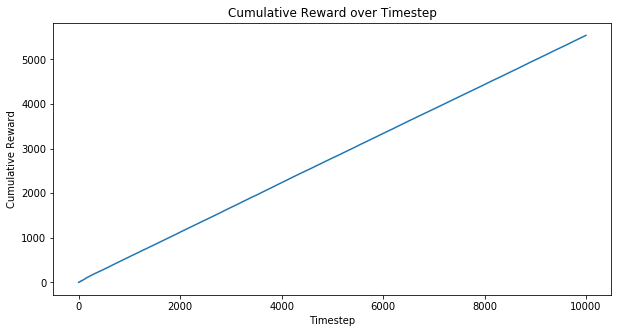

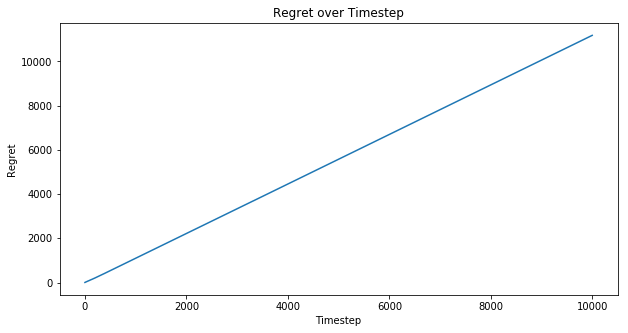

In [50]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now let's prepare another simulation by setting a different distribution, that is set distribion = "normal"

In [49]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "normal"

Run the simulation and observe the results.

What do you think the regret graph would look like?